# V4系列で吐き出されたスコアシートについて分析をするスクリプト

## ゴールとしては，このスクリプトで追加した条件によって，今後収益が出るかどうかを見分けられるルールを決めたい

### モジュールのインポート

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

import seaborn
from pandas import DataFrame
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler #アンダーサンプリング用
from sklearn.model_selection import train_test_split
import pickle
# 機械学習用
from sklearn.cluster import KMeans #クラスタリング用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
from copy import deepcopy as cp
from sklearn.linear_model import LogisticRegression
import time
import datetime
from dateutil.relativedelta import relativedelta
import os #ディレクトリ作成用
import xgboost as xgb
import sys
#自作のモジュールのインポート
sys.path.append("..")
import module.master as master
import module.modeling_scores as modeling


### 基礎集計

In [2]:
version='V4_2'#バージョン

place_master=master.get_place_master()
place_name='asiya'

#ファイルの読み込み
# for i in range(4):
#     now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
#     dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
#     model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
#     model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
#     display(model_score_df)

#testでのnum_plus_monthの数
print('testでのnum_plus_monthの数====================================================================')
for i in range(4):
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    print(model_score_df['plus_month_num_test'].value_counts().sort_index())
    



testでのnum_plus_monthの数====================================================================
st_date:2020-01-01 00:00:00
0.0    5409
1.0    5612
2.0    2520
3.0     512
4.0      59
Name: plus_month_num_test, dtype: int64
st_date:2020-04-01 00:00:00
0.0    5105
1.0    5115
2.0    3119
3.0     558
4.0     215
Name: plus_month_num_test, dtype: int64
st_date:2020-07-01 00:00:00
0.0    4850
1.0    4404
2.0    3181
3.0    1571
4.0     106
Name: plus_month_num_test, dtype: int64
st_date:2020-10-01 00:00:00
0.0    5063
1.0    5348
2.0    2682
3.0     894
4.0     120
5.0       5
Name: plus_month_num_test, dtype: int64


In [3]:
#testでのnum_plus_monthが3以上だったもののうち，での,finalのnumplus_monthの数
print('testでのnum_plus_monthが3以上だったもののうちのfinalのnumplus_monthの数====================================================================')
for i in range(4):
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    #集計
    print(model_score_df[model_score_df['plus_month_num_test']>=3]['plus_month_num_final'].value_counts().sort_index())

testでのnum_plus_monthが3以上だったもののうちのfinalのnumplus_monthの数====================================================================
st_date:2020-01-01 00:00:00
0.0      3
1.0     21
2.0    133
3.0    222
4.0    191
5.0      1
Name: plus_month_num_final, dtype: int64
st_date:2020-04-01 00:00:00
0.0    344
1.0    299
2.0    116
3.0      8
4.0      4
5.0      2
Name: plus_month_num_final, dtype: int64
st_date:2020-07-01 00:00:00
0.0    608
1.0    327
2.0    197
3.0    279
4.0    261
5.0      5
Name: plus_month_num_final, dtype: int64
st_date:2020-10-01 00:00:00
0.0    527
1.0    383
2.0    107
3.0      2
Name: plus_month_num_final, dtype: int64


In [4]:
#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち
print('#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち====================================================================')
for i in range(4):
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    #集計
    print(model_score_df[(model_score_df['plus_month_num_test']>=3) & (model_score_df['plus_month_num_final']>=3)]['target_com'].value_counts().sort_index())

#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち====================================================================
st_date:2020-01-01 00:00:00
1.0     117
2.0      16
5.0      36
6.0      13
7.0      17
10.0     71
14.0    144
Name: target_com, dtype: int64
st_date:2020-04-01 00:00:00
1.0      1
13.0     2
21.0    11
Name: target_com, dtype: int64
st_date:2020-07-01 00:00:00
4.0       1
13.0    262
15.0     82
22.0    200
Name: target_com, dtype: int64
st_date:2020-10-01 00:00:00
1.0    2
Name: target_com, dtype: int64


In [5]:
#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち
print('#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち====================================================================')
for i in range(4):
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    #集計
    print(model_score_df[(model_score_df['gain_test']>=115) & (model_score_df['gain_final']>=115)]['target_com'].value_counts().sort_index())

#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち====================================================================
st_date:2020-01-01 00:00:00
2.0       8
3.0      41
5.0       8
6.0       3
7.0     181
8.0      33
11.0     23
13.0      1
14.0    274
16.0      1
20.0     32
22.0      2
23.0      2
25.0      9
Name: target_com, dtype: int64
st_date:2020-04-01 00:00:00
1.0       1
4.0      13
12.0      7
21.0     17
22.0     12
23.0    282
25.0     23
27.0     65
Name: target_com, dtype: int64
st_date:2020-07-01 00:00:00
4.0      10
12.0    121
13.0    401
15.0    245
21.0      8
22.0    244
23.0    128
Name: target_com, dtype: int64
st_date:2020-10-01 00:00:00
1.0       2
5.0       5
11.0      1
12.0    147
13.0    244
21.0      6
22.0    252
Name: target_com, dtype: int64


In [6]:
#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち
def gainth_analysis(score_df,test_type='final'):
    
    gainth_arr=[100,110,120,140,160]
    index_arr=[0,1,2,3,4]
    cols=["gain_th","num_com","num_model(row)"]
    gainth_df=pd.DataFrame(columns=cols)
    def make_series(target_df):
        num_com=len(target_df['target_com'].value_counts().index)
        num_model=len(target_df)
        return num_com,num_model
    for gainth,i in zip(gainth_arr,index_arr):
        append_s=pd.Series(index=cols,dtype='object')
        if (i==0):
            target_df=score_df[score_df["gain_{}".format(test_type)]<gainth]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="100未満"
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        elif (i==4):
            target_df=score_df[score_df["gain_{}".format(test_type)]>=gainth]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="150以上"
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        else:
            target_df=score_df[(score_df["gain_{}".format(test_type)]<gainth_arr[i])&(score_df["gain_{}".format(test_type)]>=gainth_arr[i-1])]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="{}以上_{}未満".format(gainth_arr[i-1],gainth_arr[i])
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        gainth_df=gainth_df.append(append_s,ignore_index=True)
    return gainth_df

print('#testでnum_plus_monthが3以上だったモデルのgain分析====================================================================')
for i in range(4):
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    monthly_df=model_score_df[model_score_df['plus_month_num_test']>=3]
    gainth_df=gainth_analysis(monthly_df)
    #集計
    display(gainth_df)
    
    


#testでnum_plus_monthが3以上だったモデルのgain分析====================================================================
st_date:2020-01-01 00:00:00


,gain_th,num_com,num_model(row)
0,100未満,8,96
1,100以上_110未満,7,190
2,110以上_120未満,7,158
3,120以上_140未満,5,120
4,150以上,1,1


st_date:2020-04-01 00:00:00


,gain_th,num_com,num_model(row)
0,100未満,8,606
1,100以上_110未満,4,13
2,110以上_120未満,4,17
3,120以上_140未満,3,59
4,150以上,4,23


st_date:2020-07-01 00:00:00


,gain_th,num_com,num_model(row)
0,100未満,10,1041
1,100以上_110未満,3,24
2,110以上_120未満,3,33
3,120以上_140未満,5,86
4,150以上,4,337


st_date:2020-10-01 00:00:00


,gain_th,num_com,num_model(row)
0,100未満,8,732
1,100以上_110未満,5,35
2,110以上_120未満,4,37
3,120以上_140未満,4,80
4,150以上,3,68


# 変数の条件決め

### 関数

In [25]:
#test,finalでnum_plus_monthが3以上だったモデルの重複なしでのcomたち
def gainth_analysis(score_df,test_type='final'):
    
    gainth_arr=[100,110,120,140,160]
    index_arr=[0,1,2,3,4]
    cols=["gain_th","num_com","num_model(row)"]
    gainth_df=pd.DataFrame(columns=cols)
    def make_series(target_df):
        num_com=len(target_df['target_com'].value_counts().index)
        num_model=len(target_df)
        return num_com,num_model
    for gainth,i in zip(gainth_arr,index_arr):
        append_s=pd.Series(index=cols,dtype='object')
        if (i==0):
            target_df=score_df[score_df["gain_{}".format(test_type)]<gainth]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="100未満"
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        elif (i==4):
            target_df=score_df[score_df["gain_{}".format(test_type)]>=gainth]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="150以上"
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        else:
            target_df=score_df[(score_df["gain_{}".format(test_type)]<gainth_arr[i])&(score_df["gain_{}".format(test_type)]>=gainth_arr[i-1])]
            num_com,num_model=make_series(target_df)
            append_s['gain_th']="{}以上_{}未満".format(gainth_arr[i-1],gainth_arr[i])
            append_s['num_com']=num_com
            append_s['num_model(row)']=num_model
        gainth_df=gainth_df.append(append_s,ignore_index=True)
    return gainth_df

def twin_plt(x,y1,y2,x_n,y1_n,y2_n):
    fig = plt.figure(figsize=(19,8))
    plt.tick_params(colors='white')
    plt.rcParams["font.size"] = 18
    
    ax1 = fig.add_subplot()
    ax1.plot(x, y1,label=y1_n)
    ax1.tick_params(colors='white')

    ax2 = ax1.twinx()
    #print(y2)
    ax2.plot(x, y2,label=y2_n,color='red')
    ax2.tick_params(colors='white')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='lower center')

    ax1.set_xlabel(x_n,color='white')
    ax1.set_ylabel(y1_n,color='white')
    ax2.set_ylabel(y2_n,color='white')
    plt.show()
    return None

## グラフについて
### 横軸：閾値の値
### 各縦軸：指定した閾値を設定した時の，最終的なgain_perが110よりも大きかったcomやモデルの数

## num_plus_month=2か3，悩み中

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


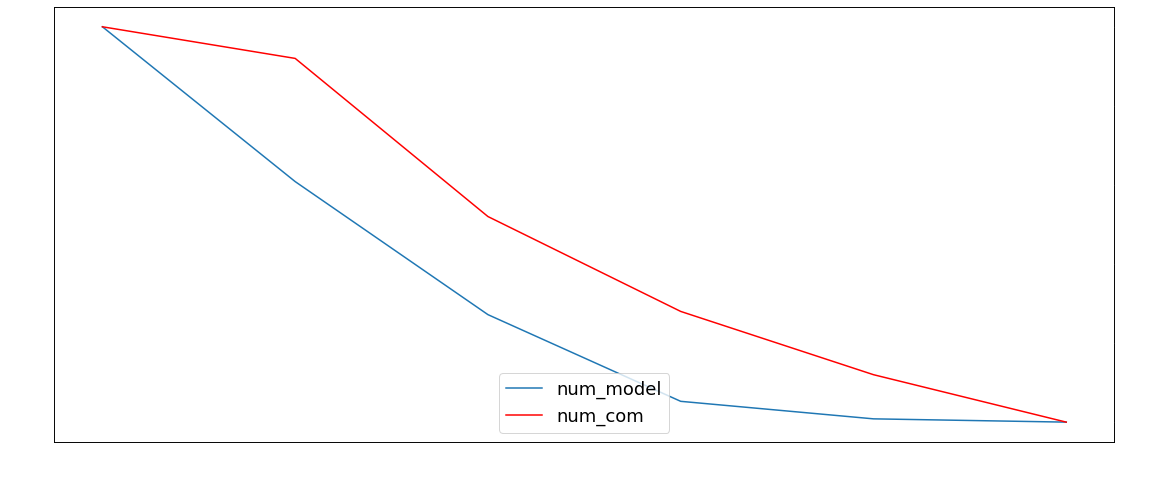

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


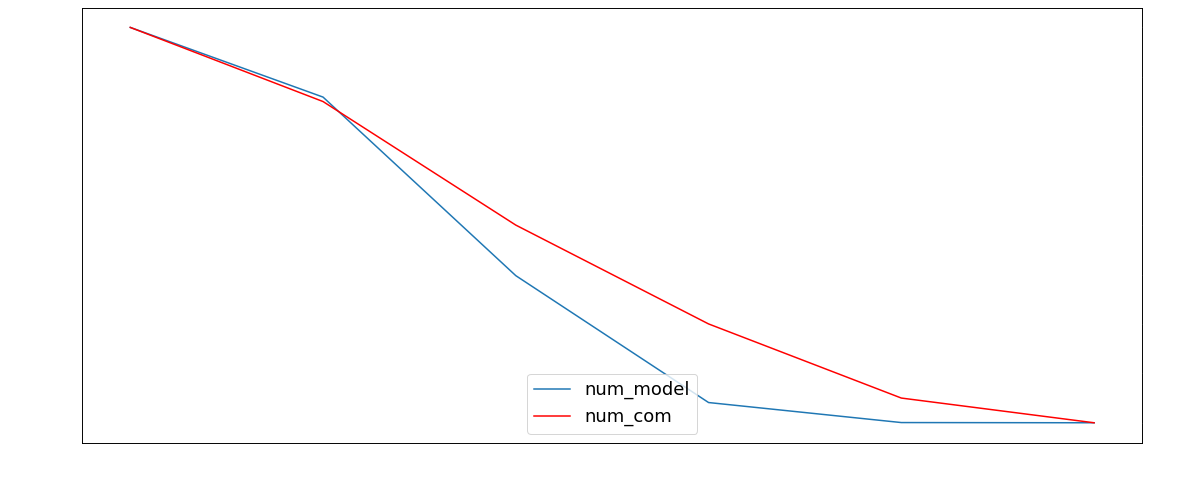

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


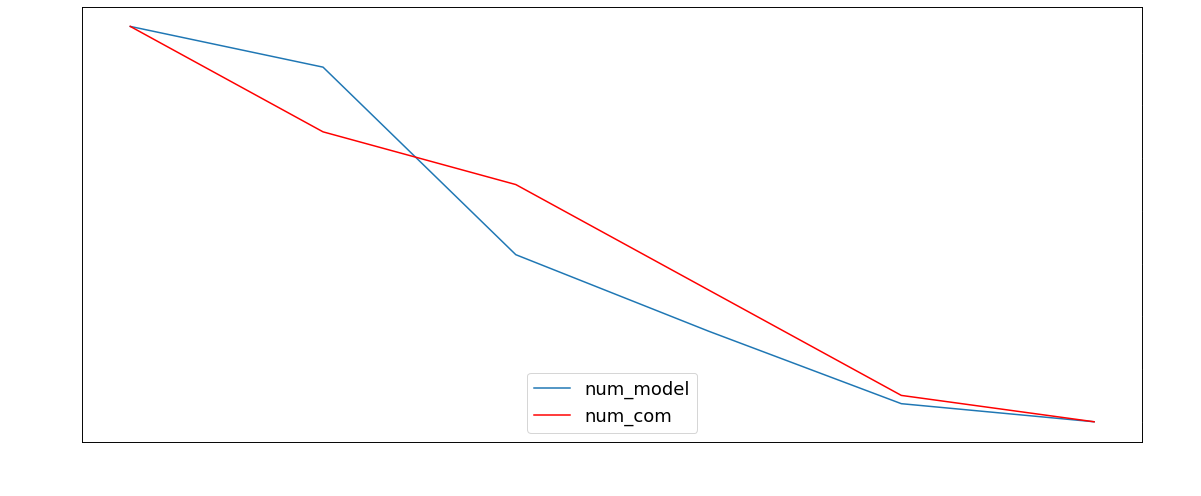

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


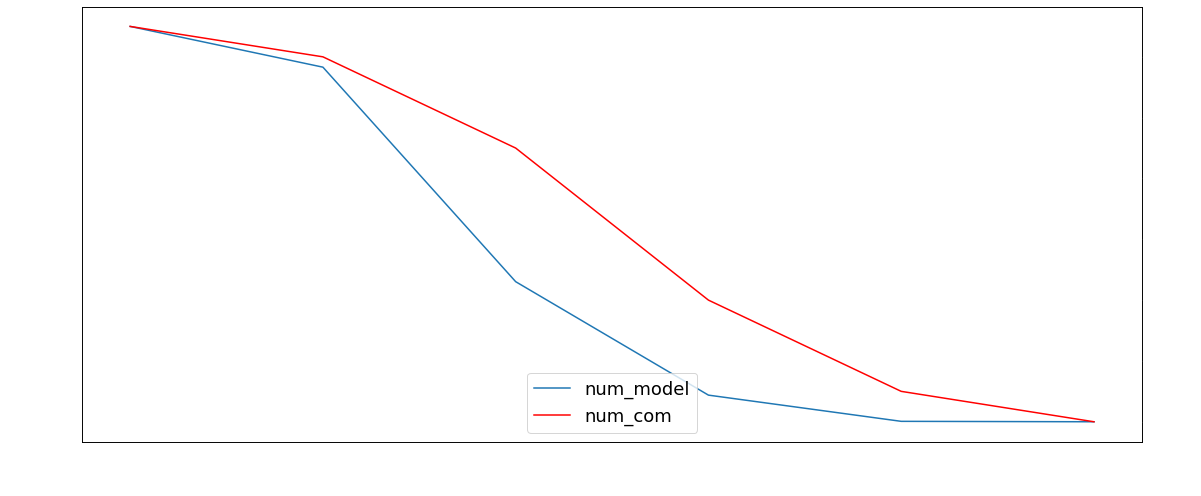

In [26]:
#成績が良かったcomの数とmodelの数
target_feature='plus_month_num_test'
f_th_arr=[0,1,2,3,4,5]

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #monthly_df=model_score_df[model_score_df['plus_month_num_test']>=3]
        monthly_df=model_score_df.copy()
        monthly_th_df=model_score_df[model_score_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n='num_plus_month'
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


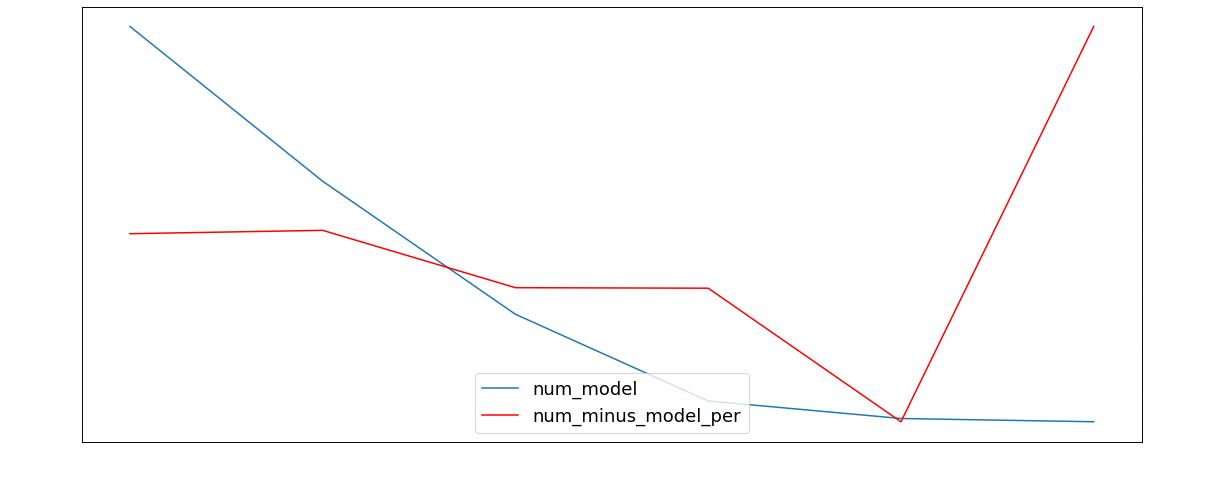

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


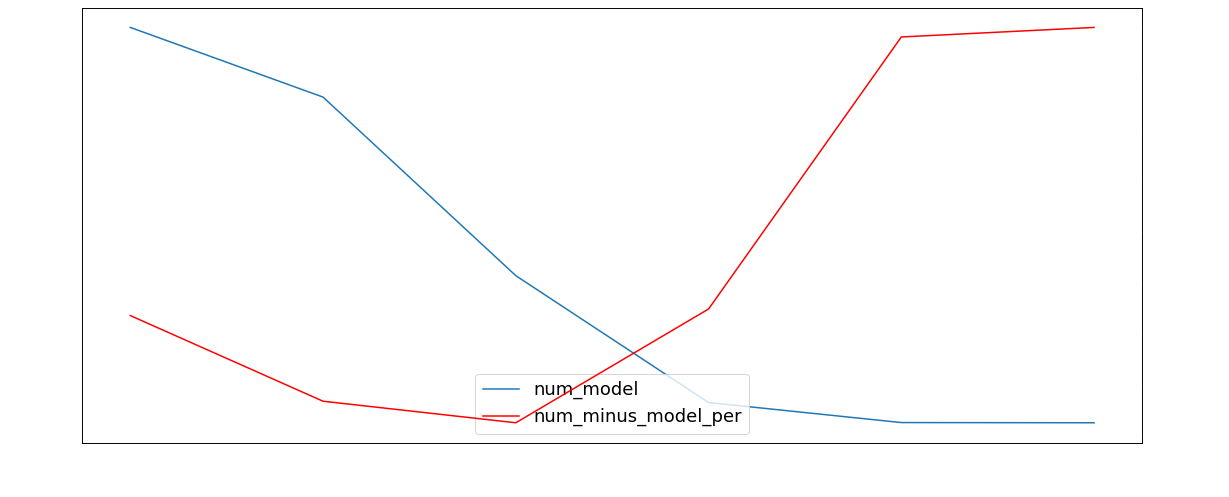

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


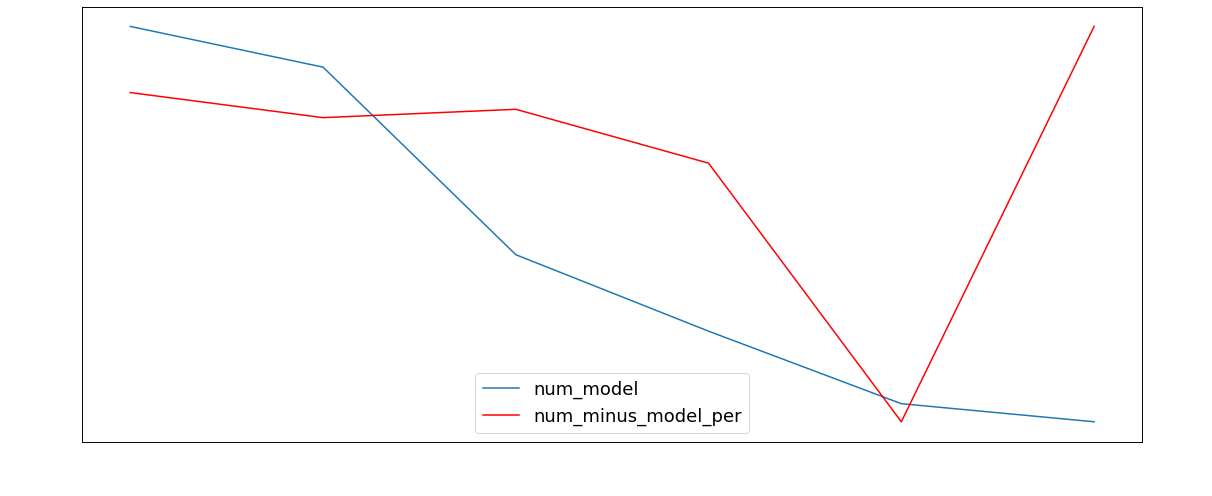

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


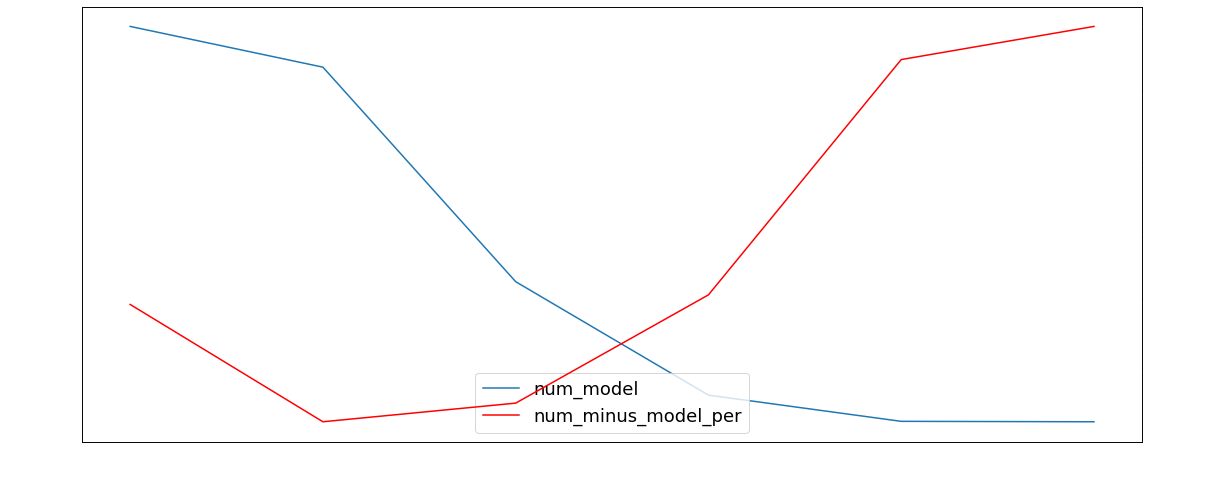

In [31]:
#生成が良かったmodelの数と，全体のうち生先が悪かったcomの割合
target_feature='plus_month_num_test'
f_th_arr=[0,1,2,3,4,5]

for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #monthly_df=model_score_df[model_score_df['plus_month_num_test']>=3]
        monthly_df=model_score_df.copy()
        monthly_th_df=model_score_df[model_score_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        #display(plus_df)
        #display(minus_df)
        #num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n='num_plus_month'
    y1_n='num_model'
    y2_n='num_minus_model_per'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)

## num_hit=5(ほぼこれでいい気がする，)

st_date:2020-01-01 00:00:00


<ipython-input-7-456f638fa24f>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


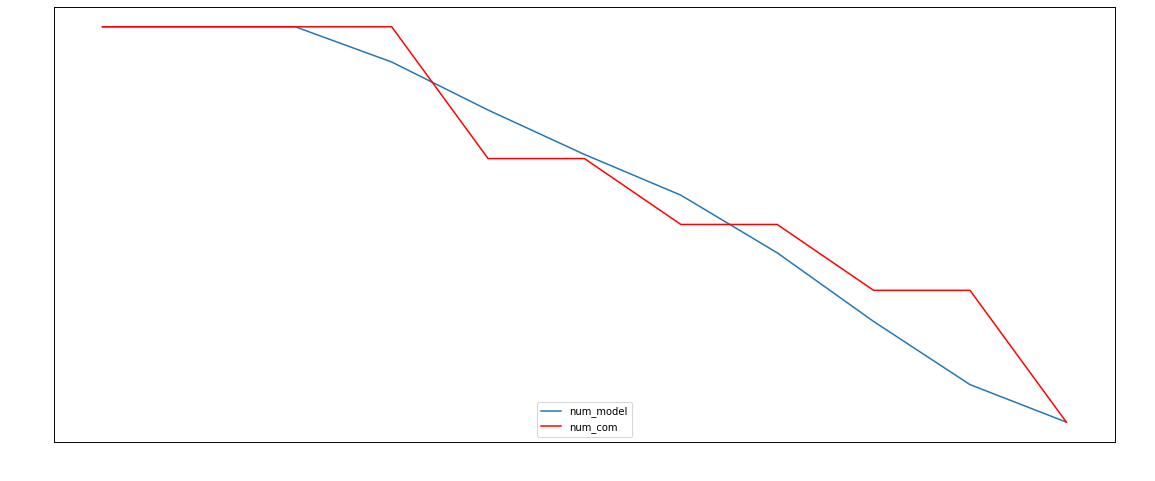

st_date:2020-04-01 00:00:00


<ipython-input-7-456f638fa24f>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


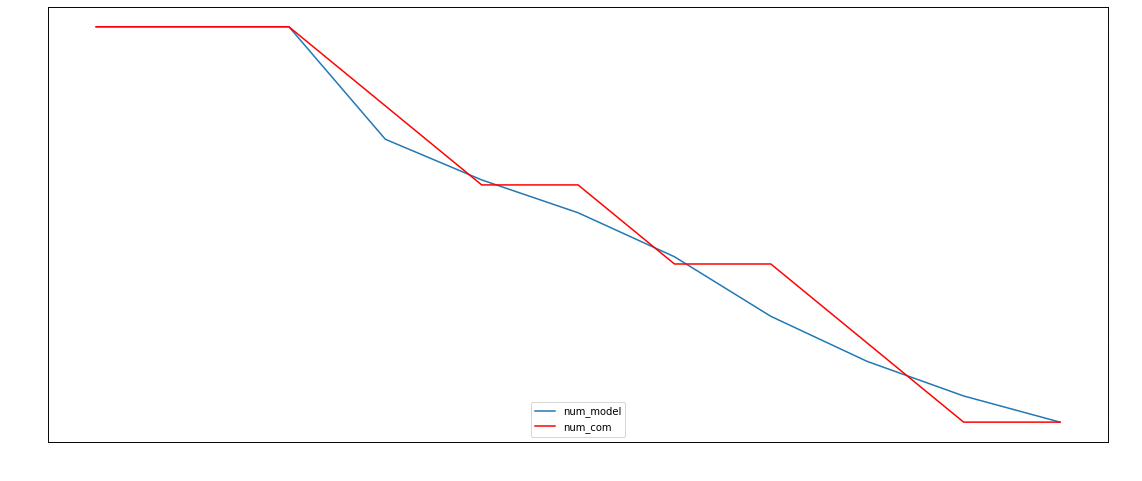

st_date:2020-07-01 00:00:00


<ipython-input-7-456f638fa24f>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


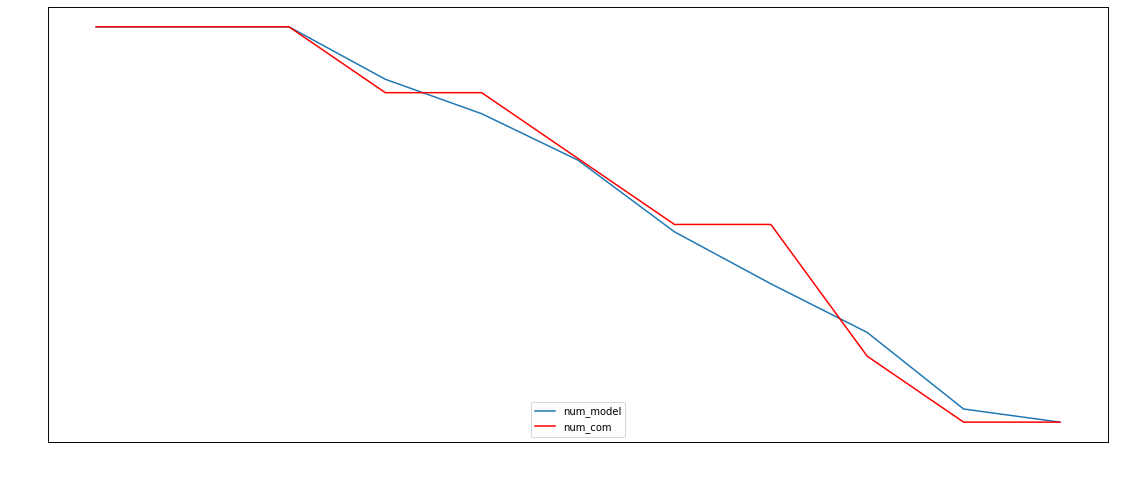

st_date:2020-10-01 00:00:00


<ipython-input-7-456f638fa24f>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


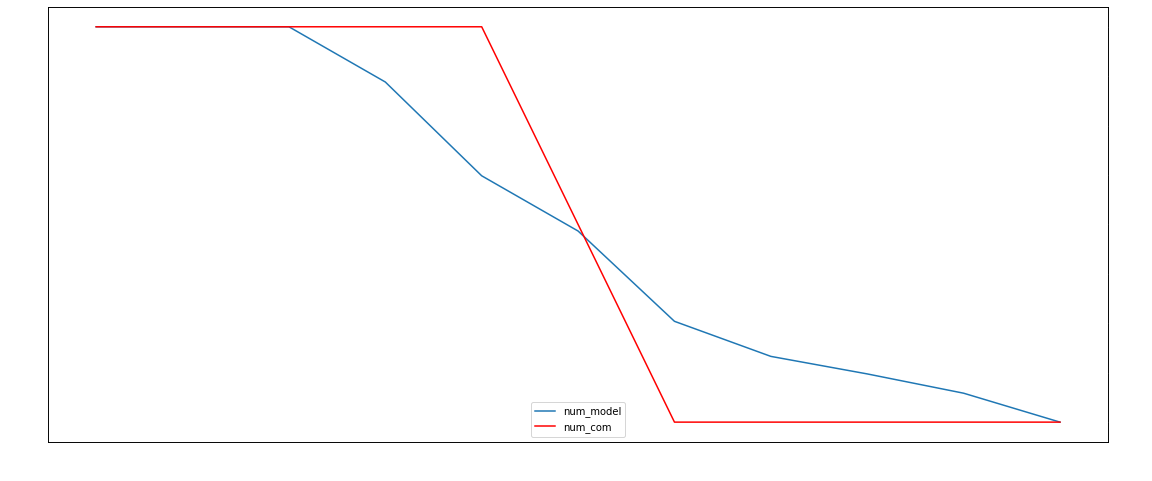

In [9]:
target_feature='num_hit_test'
f_th_arr=[0,1,2,3,4,5,6,7,8,9,10]

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_th_df=monthly_df[monthly_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n='num_hit_test'
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


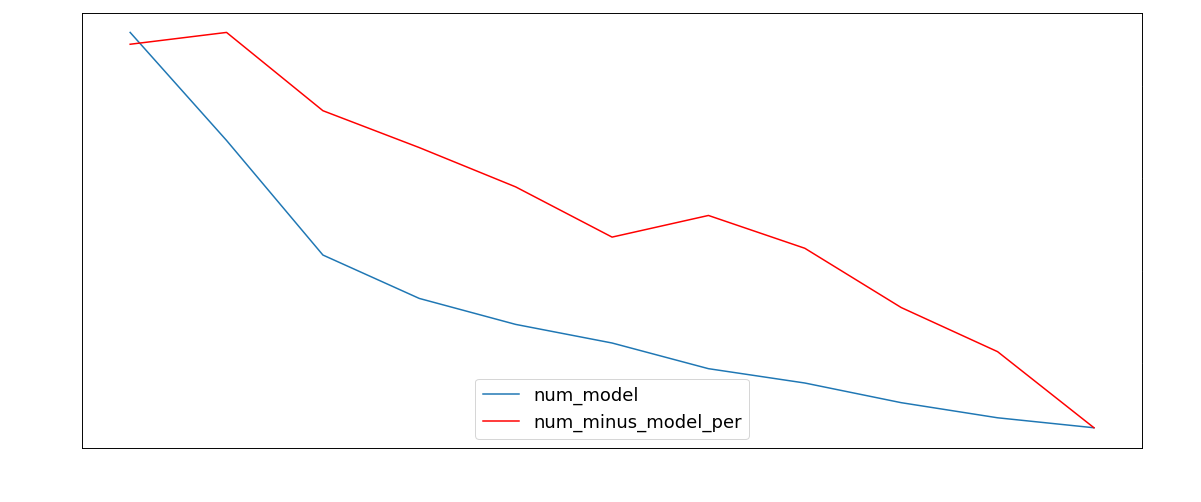

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


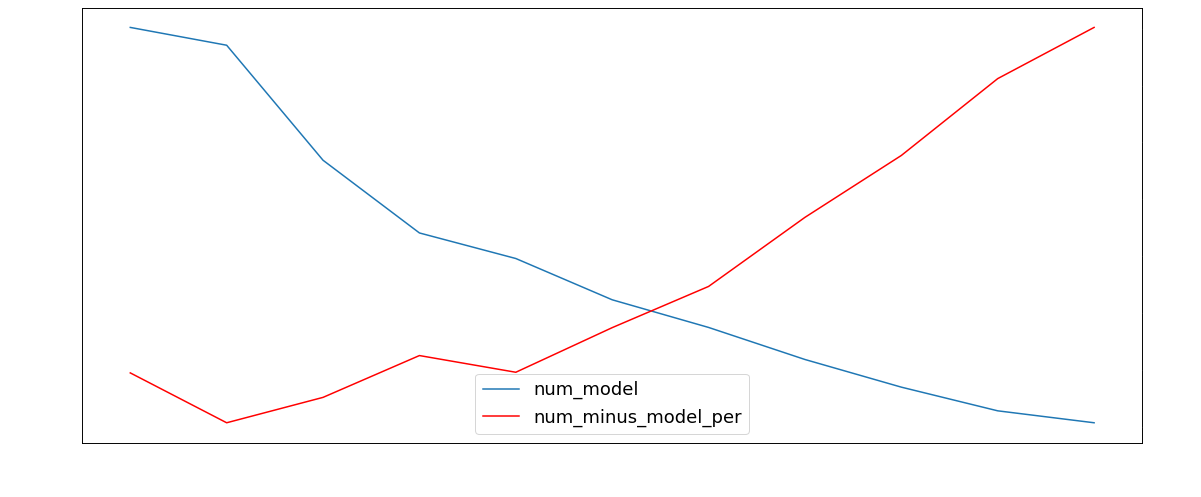

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


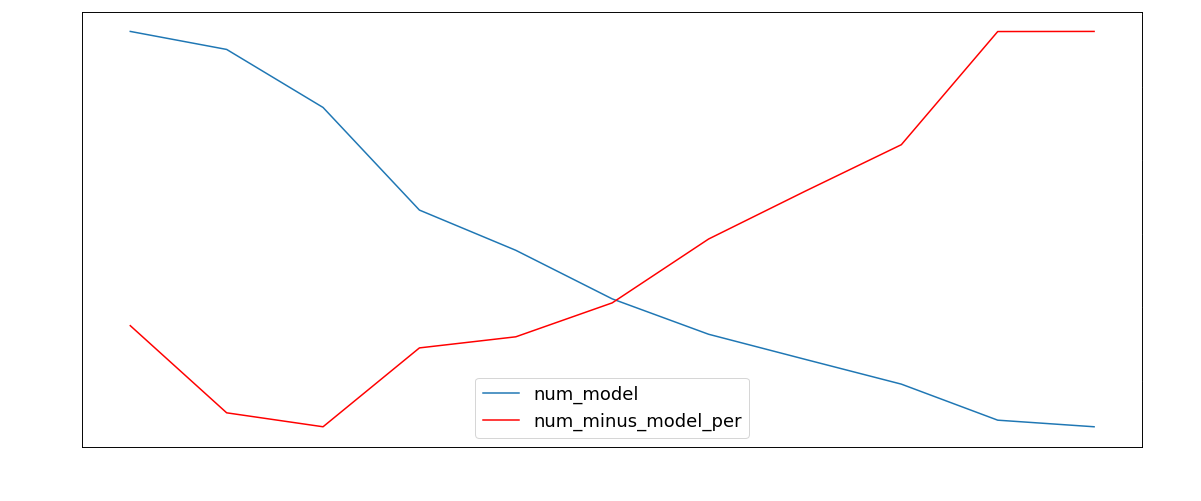

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


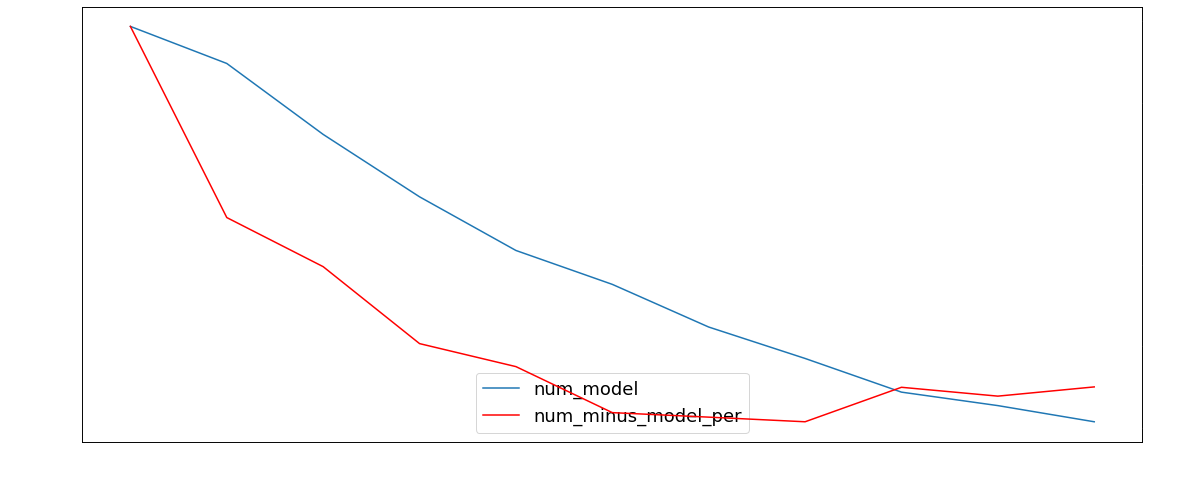

In [33]:
#成績が良かったmodelの数と，全体のうち生先が悪かったcomの割合
target_feature='num_hit_test'
f_th_arr=[0,1,2,3,4,5,6,7,8,9,10]

for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        #monthly_df=model_score_df.copy()
        monthly_th_df=model_score_df[model_score_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        #display(plus_df)
        #display(minus_df)
        #num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n='num_hit_test'
    y1_n='num_model'
    y2_n='num_minus_model_per'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)

# ここからは条件が決まっても次に追加せず，個々で見ていく
＝後ほど偏差値評価の重みづけで使う（今のところ）ので．

## gain_per
＝知りたいこと，テストで利益が悪いものはfinlでも利益が悪いのか<br>
＝利益の閾値でマイナスモデルの割合を減らせるか<br>
=偏差値評価の際の重みづけの参考にする

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


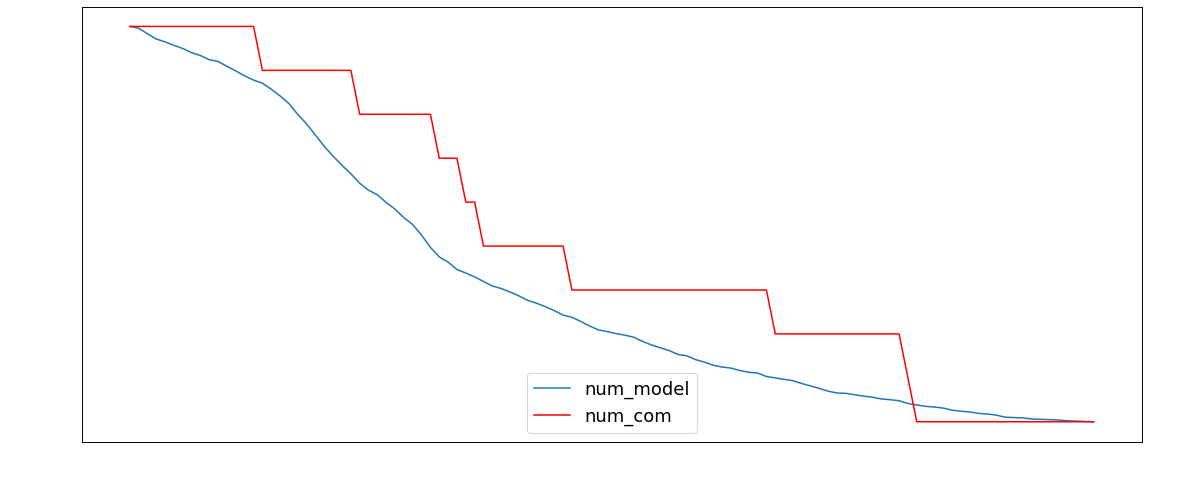

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


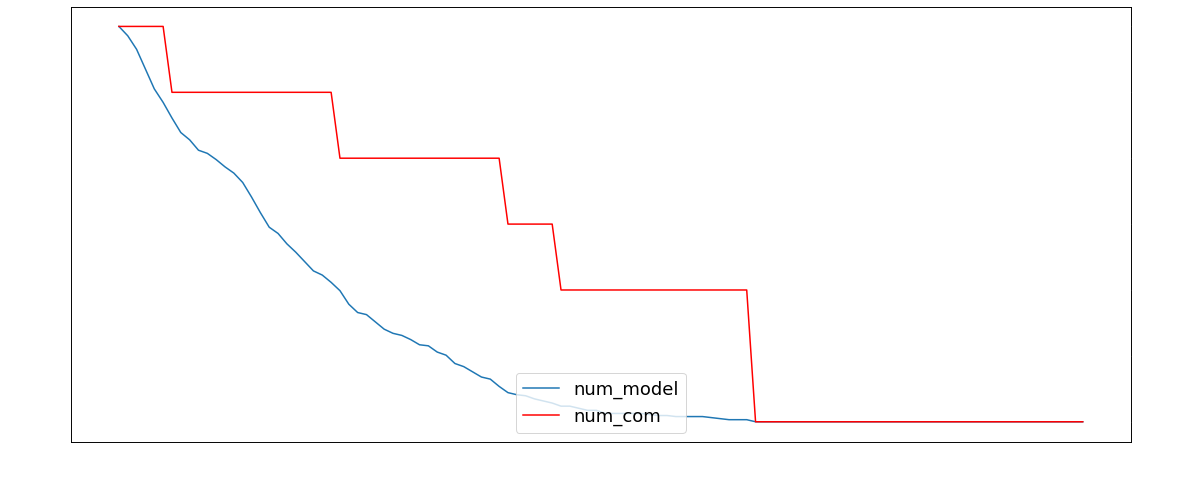

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


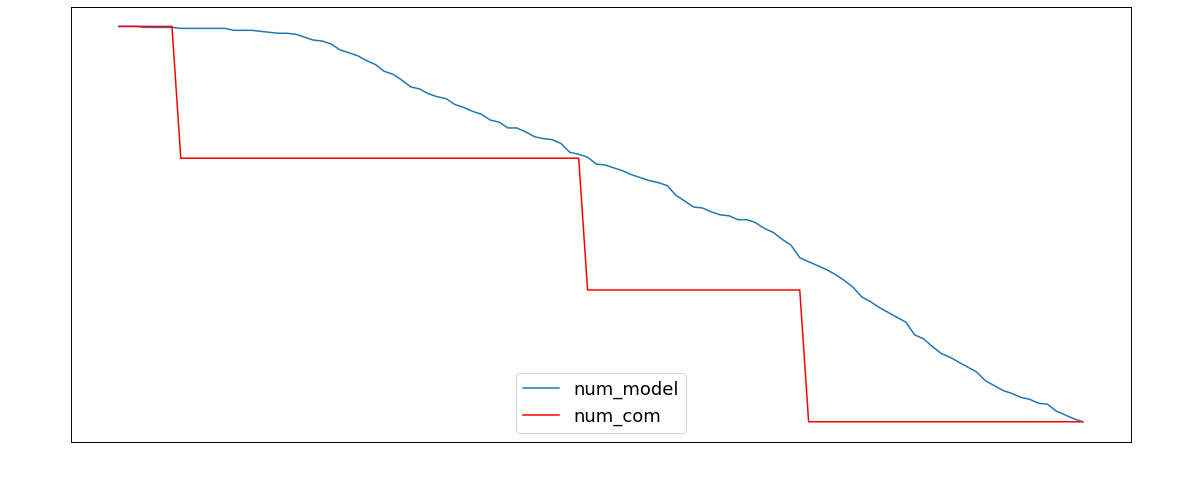

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


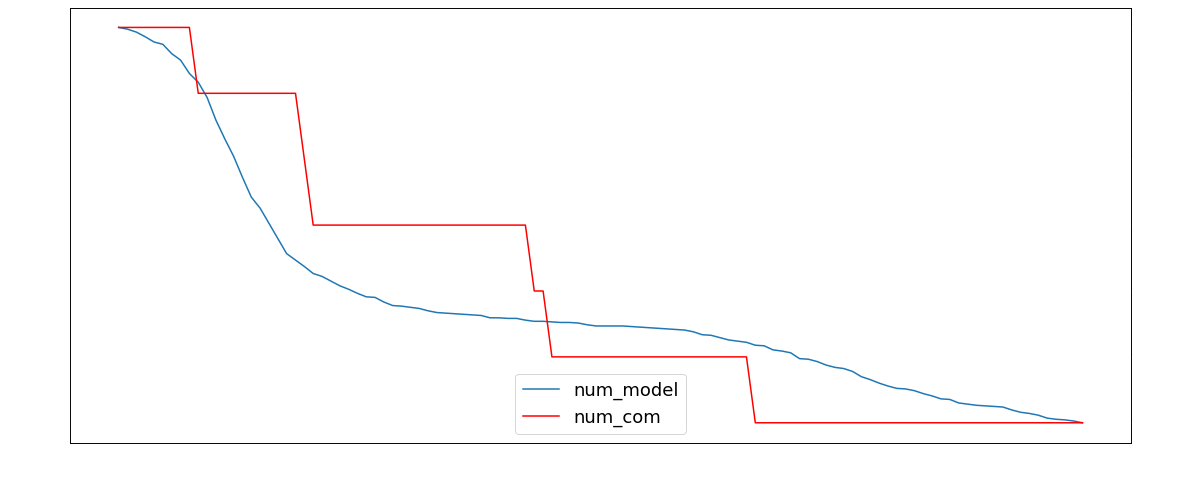

In [44]:
target_feature='gain_test'
f_th_arr=np.arange(70, 180)

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


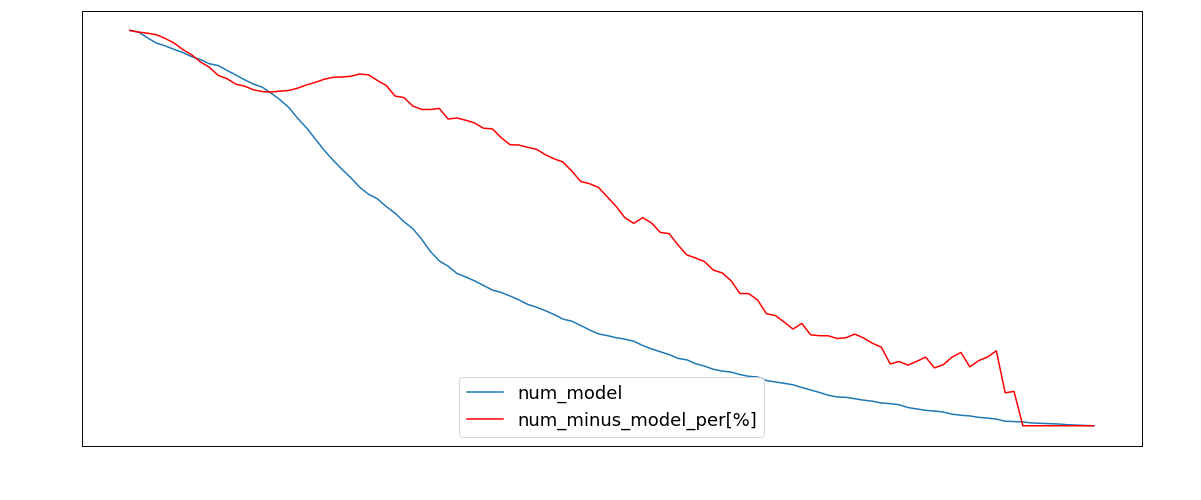

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


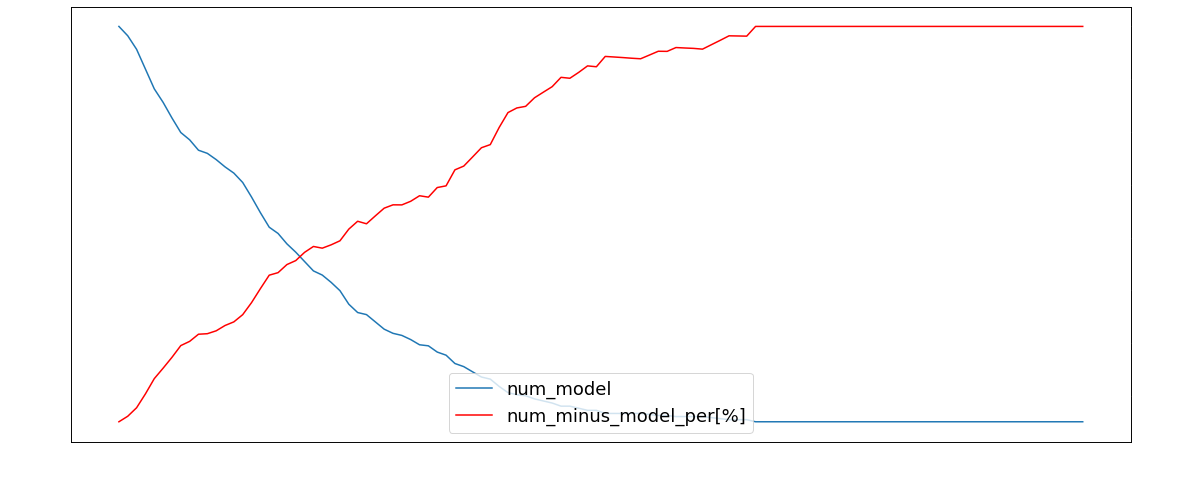

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


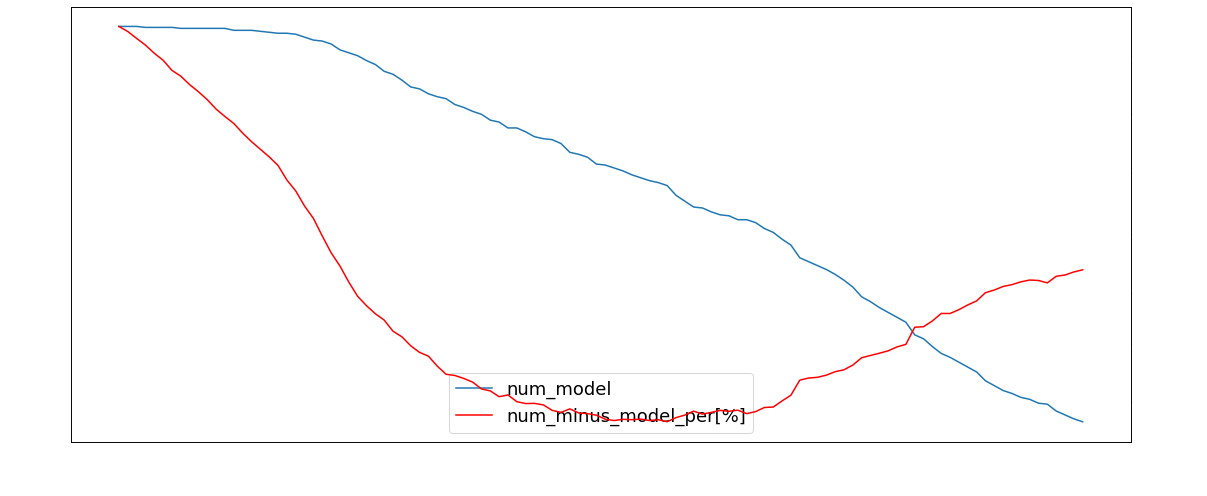

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


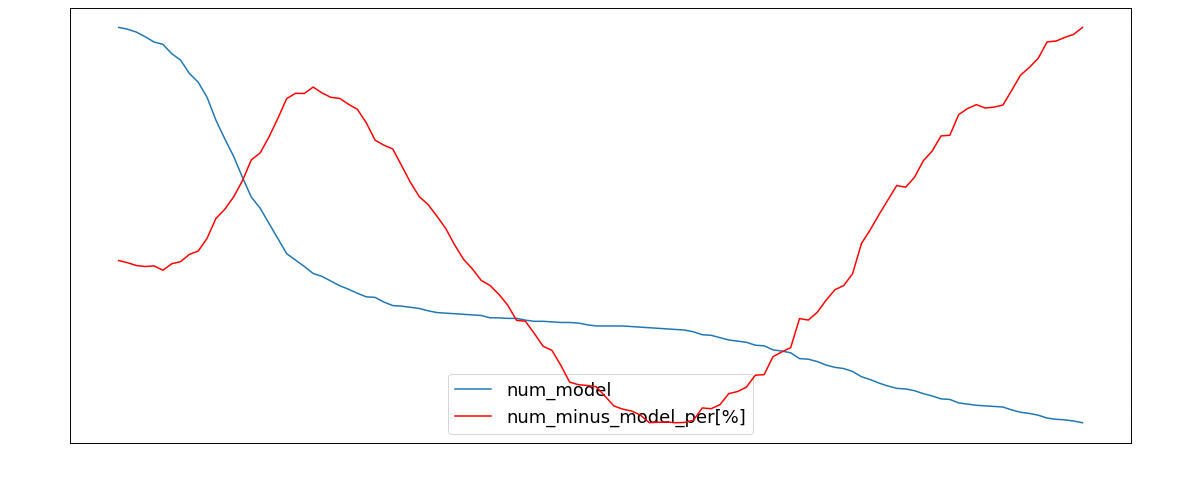

In [46]:
target_feature='gain_test'
f_th_arr=np.arange(70, 180)

for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_minus_model_per[%]'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)

## gain_std

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


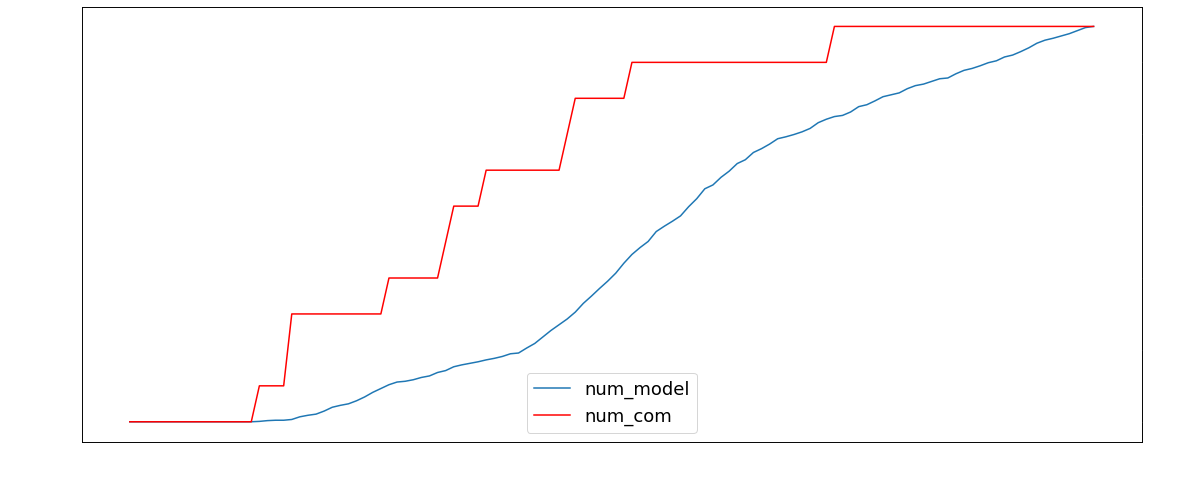

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


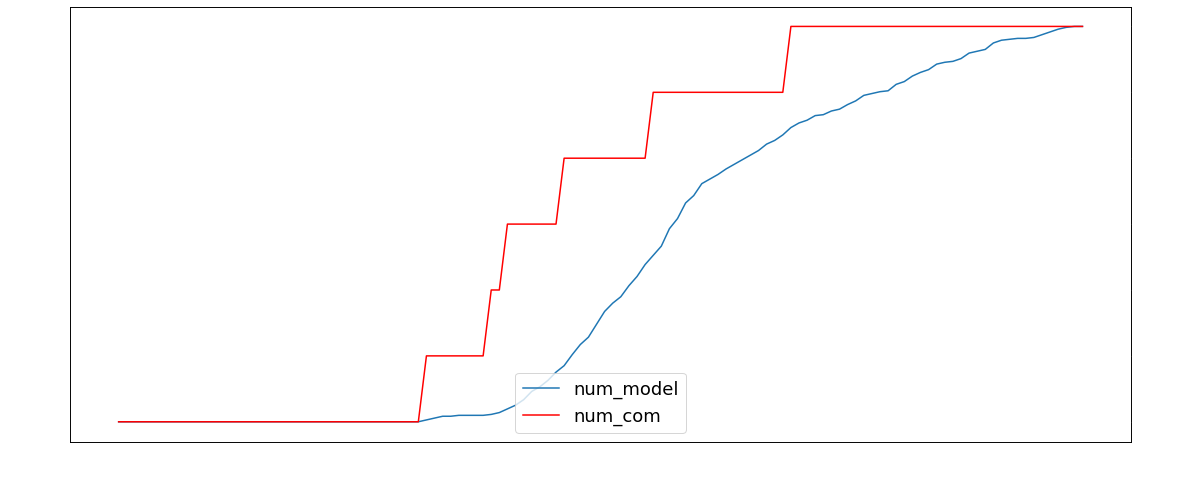

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


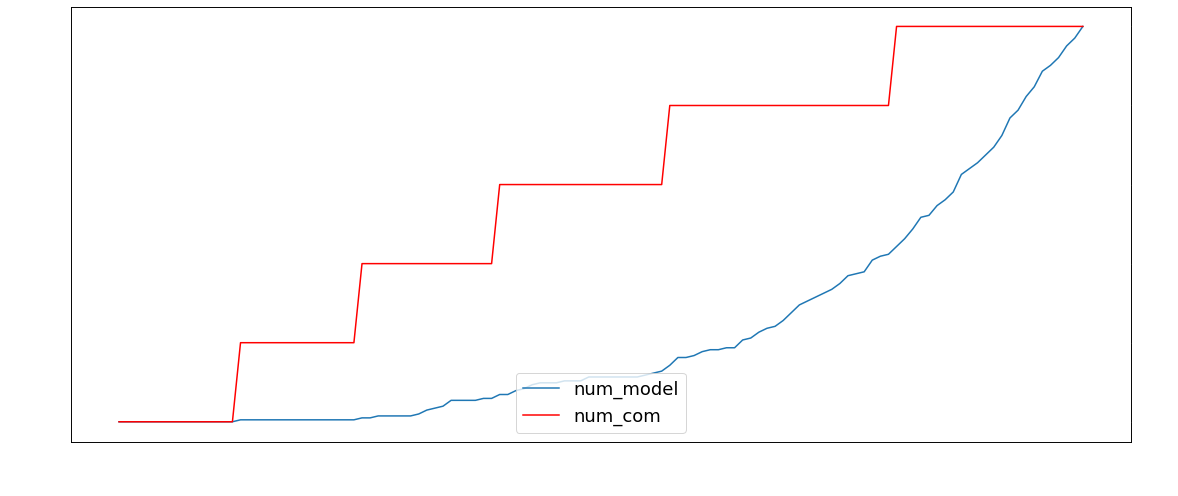

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


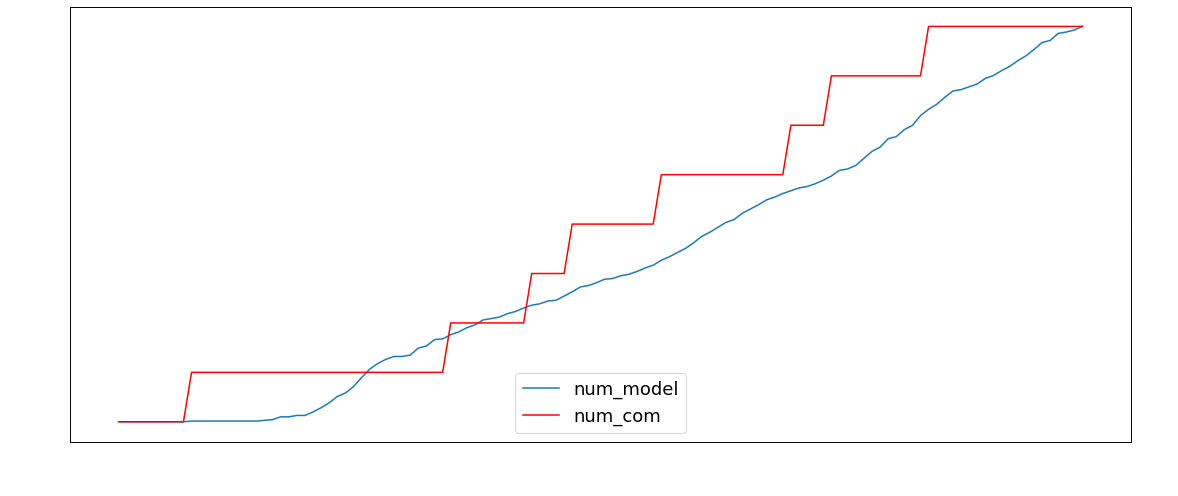

In [47]:
target_feature='gain_std_test'
f_th_arr=np.arange(10, 130)

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]<=f_th_arr[f_th_i]].copy()#stdは小さいほうがうれしいので符号が逆転している
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


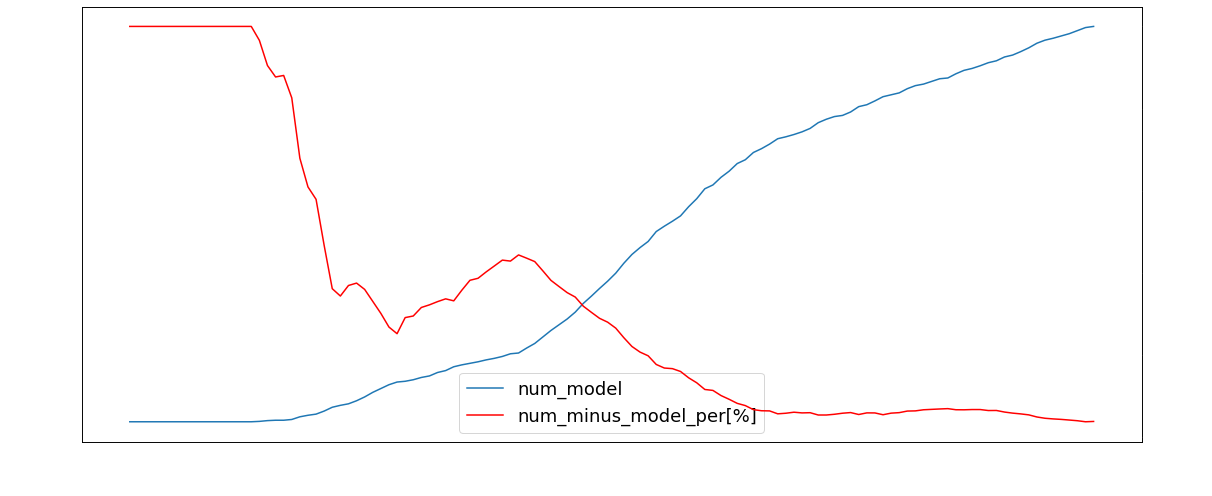

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


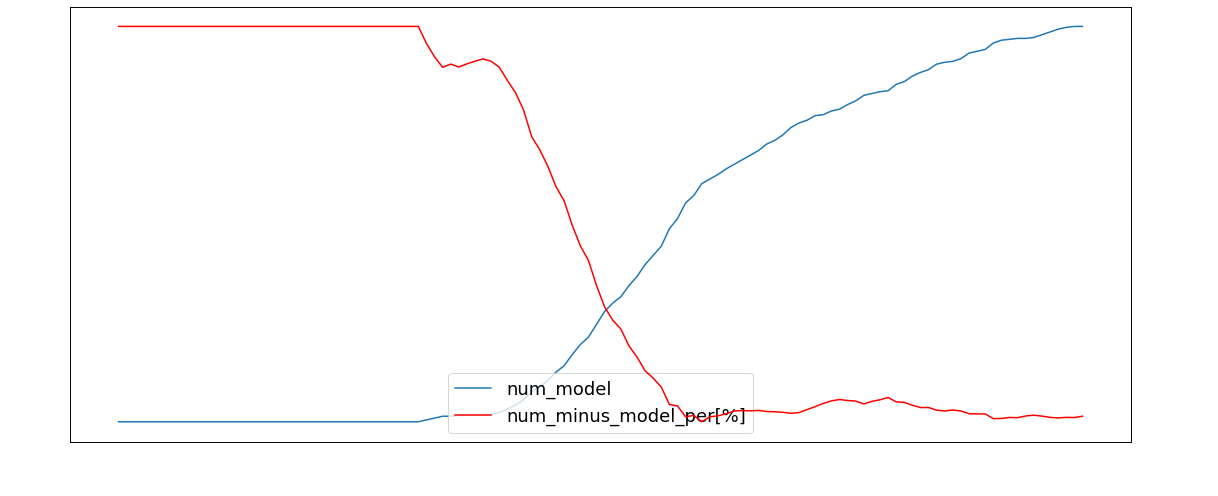

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


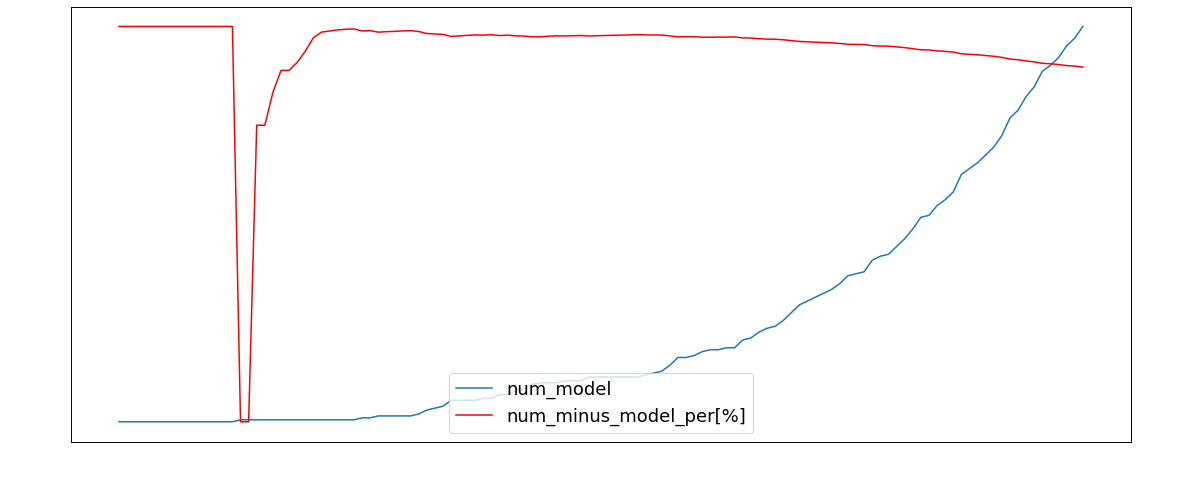

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


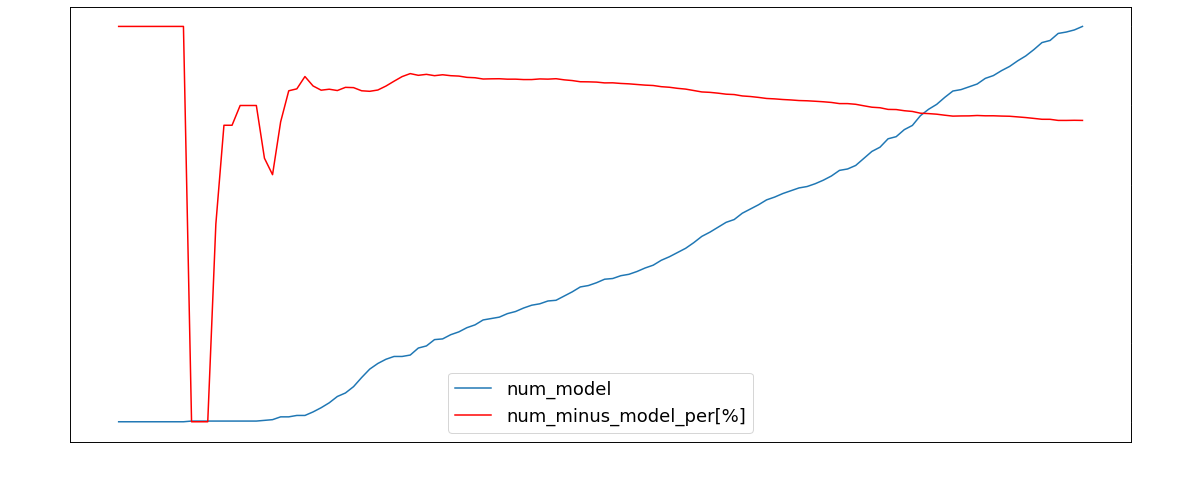

In [48]:
target_feature='gain_std_test'
f_th_arr=np.arange(10, 130)

for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]<=f_th_arr[f_th_i]].copy()#stdは小さいほうがうれしいので符号が逆転している
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_minus_model_per[%]'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)

## buy_hit_per

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


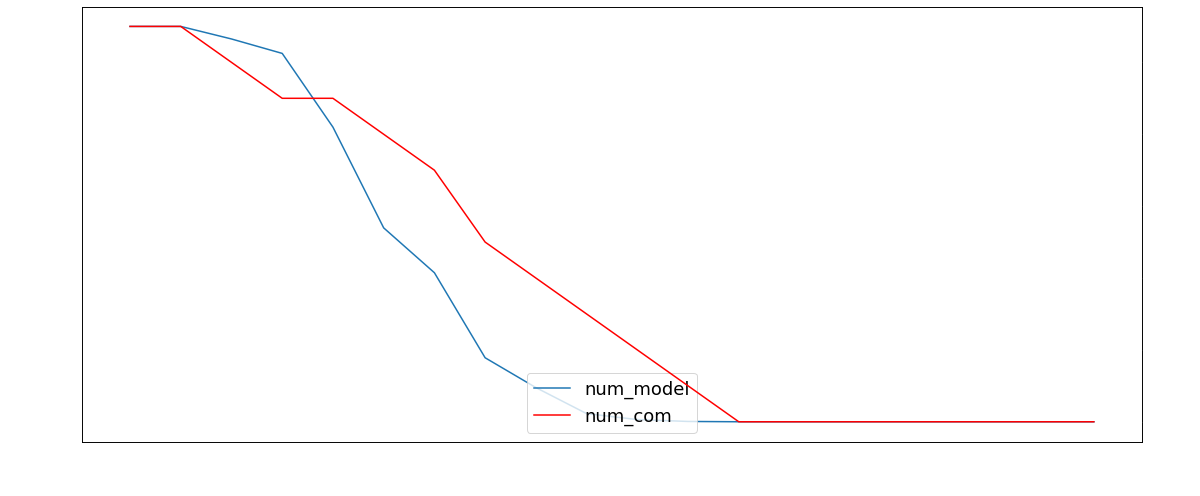

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


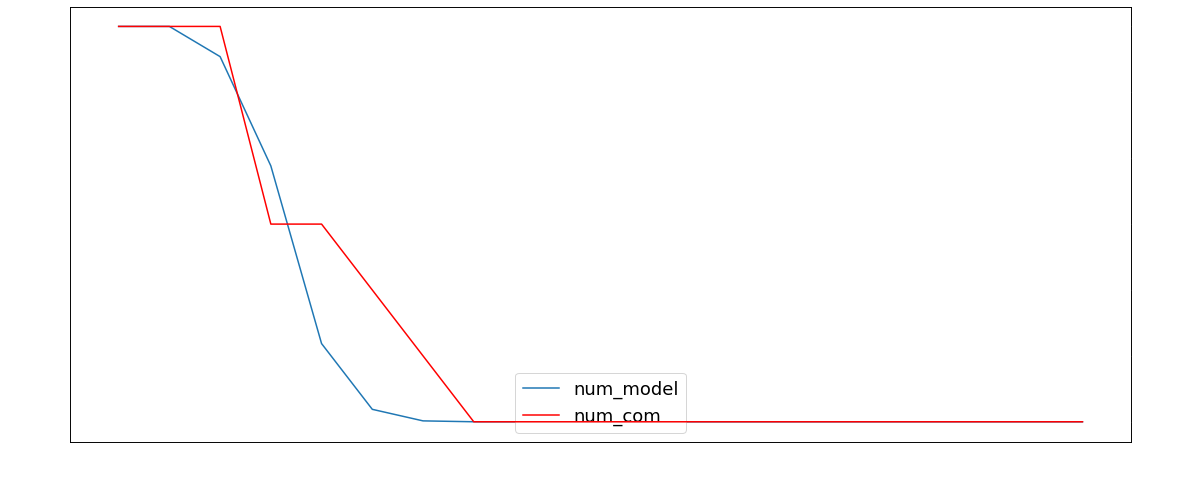

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


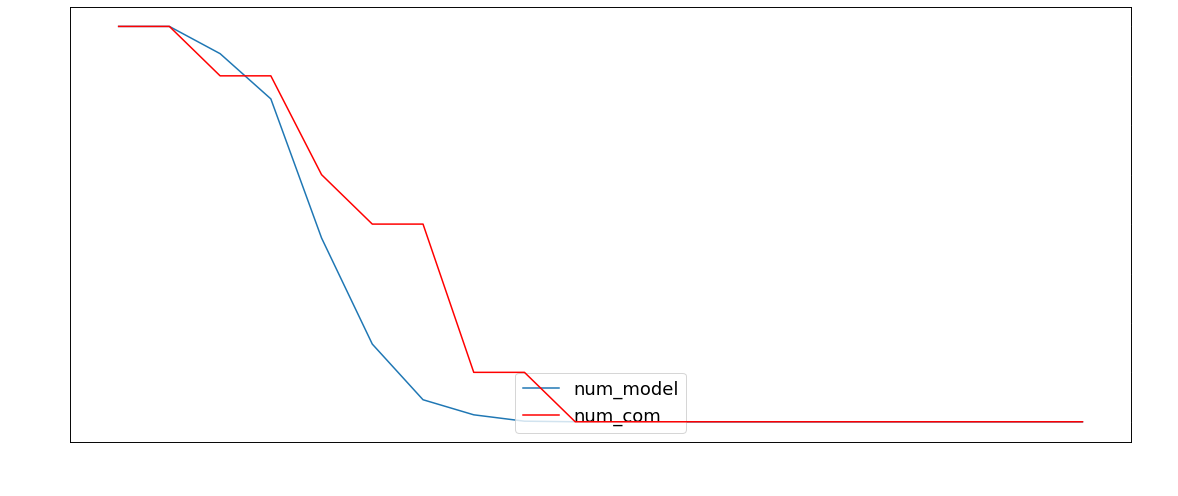

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


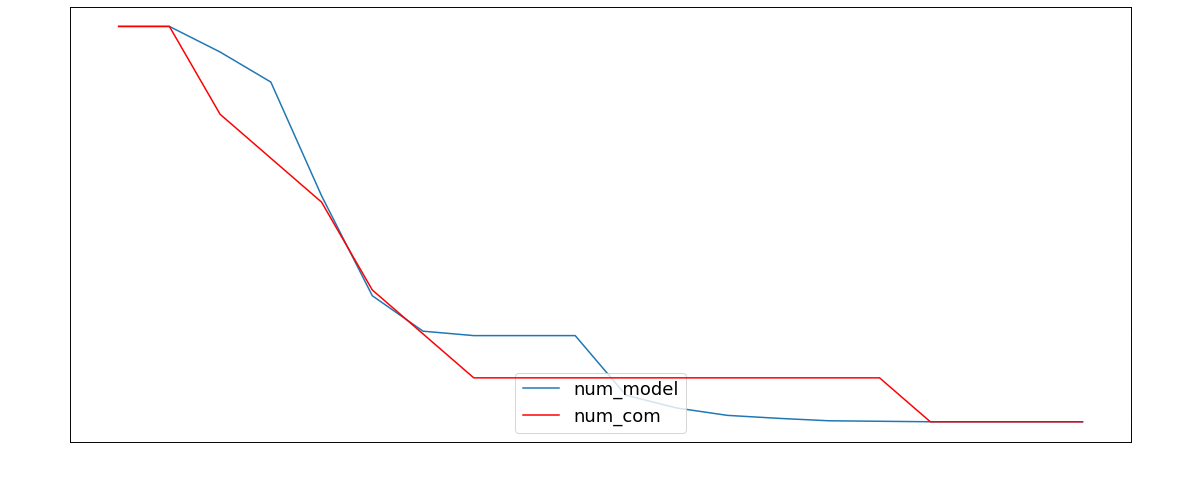

In [51]:
target_feature='buy_hit_per_test'
f_th_arr=np.arange(0,20)

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


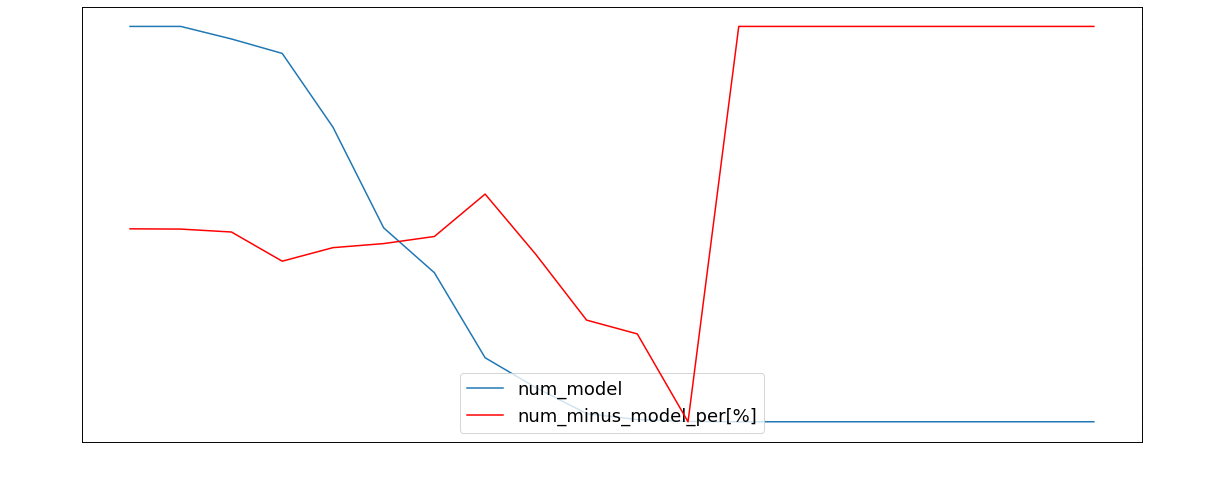

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


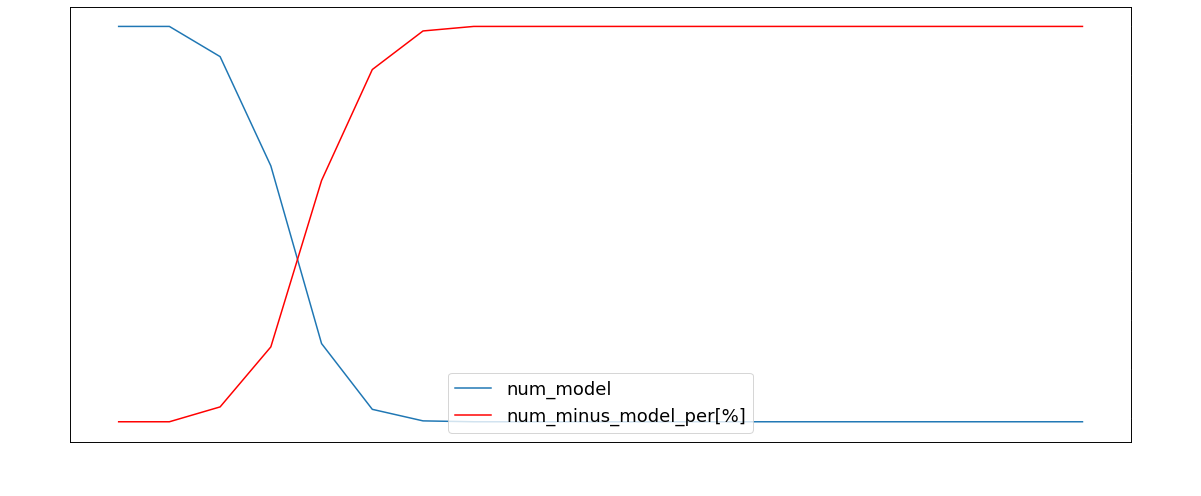

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


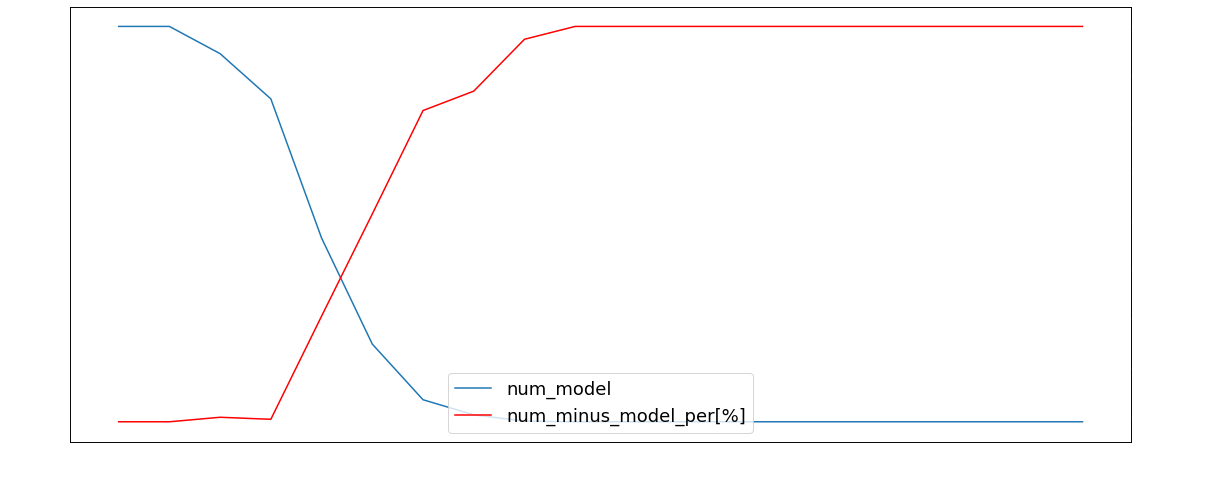

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


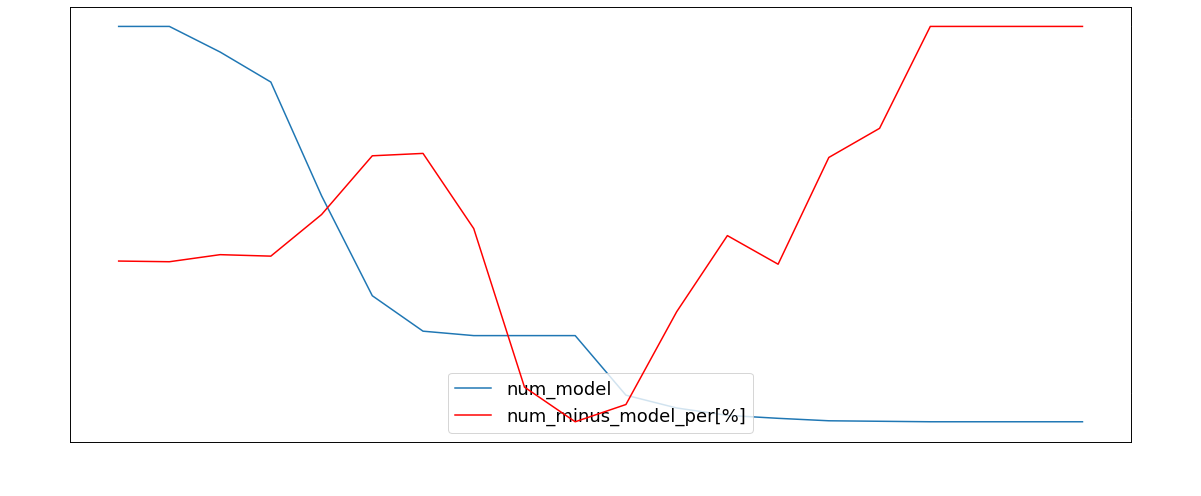

In [52]:
target_feature='buy_hit_per_test'
f_th_arr=np.arange(0,20)
for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]>=f_th_arr[f_th_i]].copy()
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_minus_model_per[%]'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)

## buy_hit_per_std

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


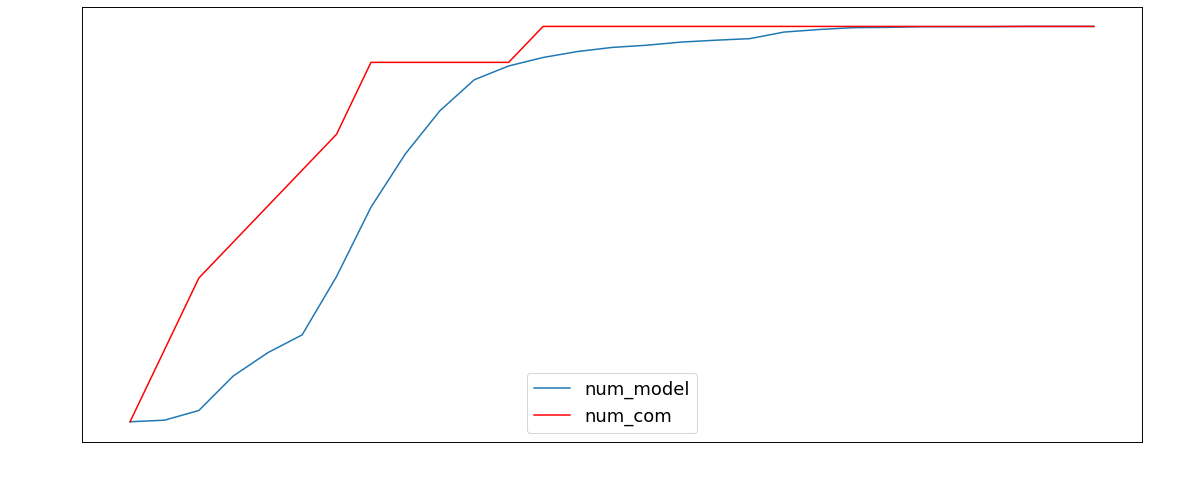

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


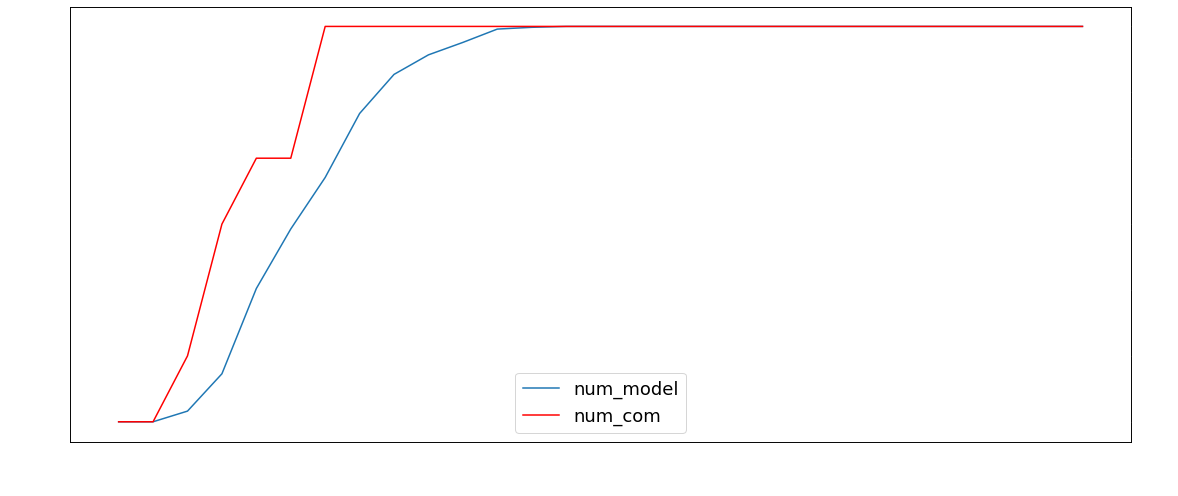

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


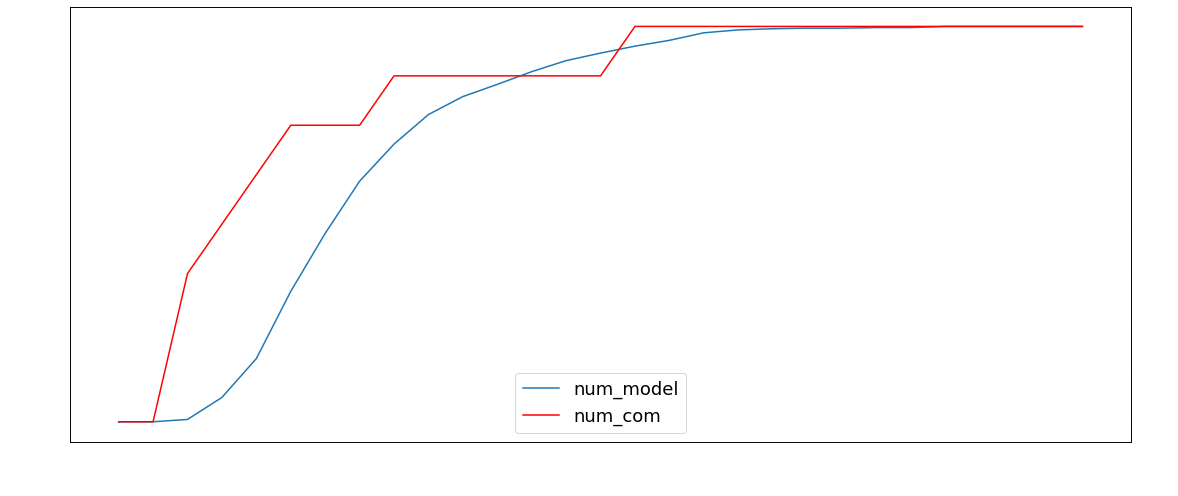

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


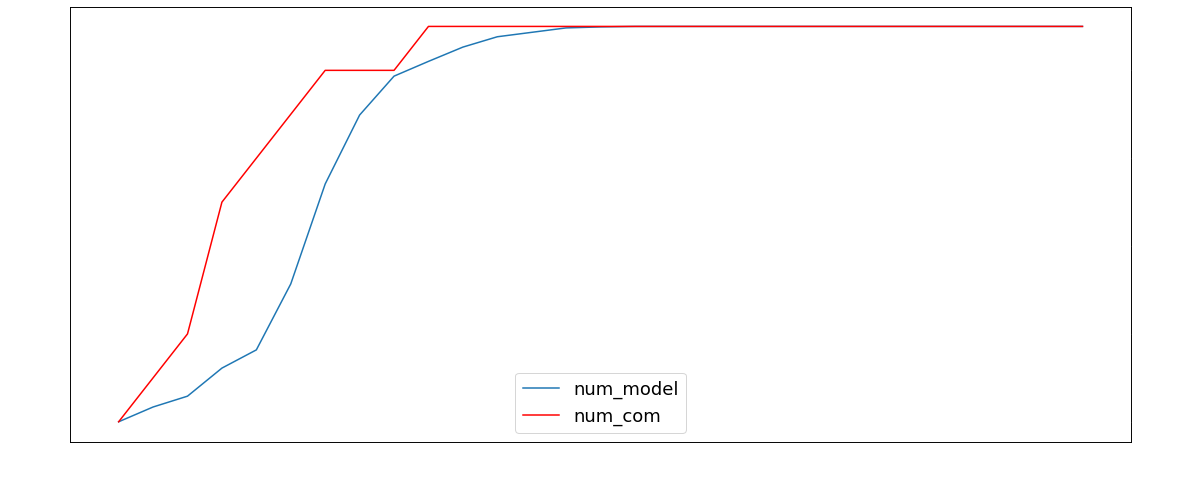

In [55]:
target_feature='buy_hit_per_std_test'
f_th_arr=np.arange(0.1, 3.0, 0.1)

for i in range(4):
    a_com_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]<=f_th_arr[f_th_i]].copy()#stdは小さいほうがうれしいので符号が逆転している
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        num_plus_com=plus_df['num_com'].max()#若干結果が変わってしまうが，そんなに問題はない
        a_model_arr[f_th_i]=num_plus_model
        a_com_arr[f_th_i]=num_plus_com
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_com'
    twin_plt(f_th_arr,a_model_arr,a_com_arr,x_n,y1_n,y2_n)

st_date:2020-01-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


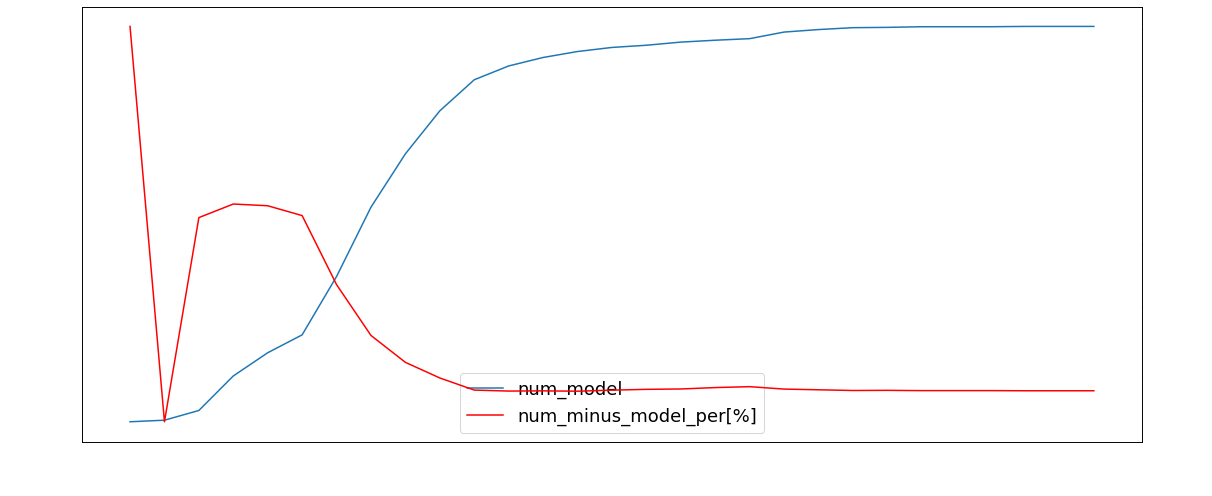

st_date:2020-04-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


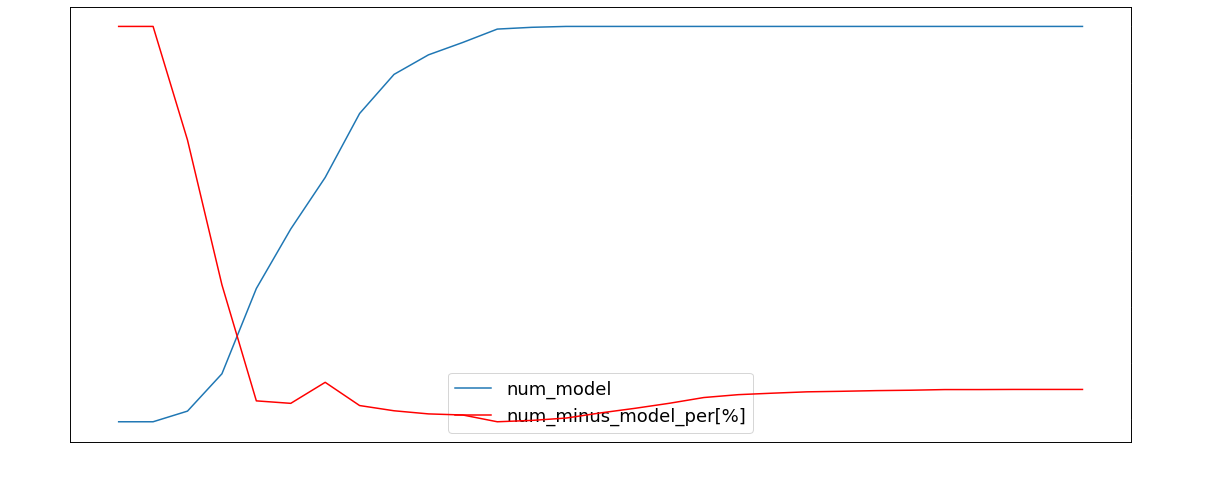

st_date:2020-07-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


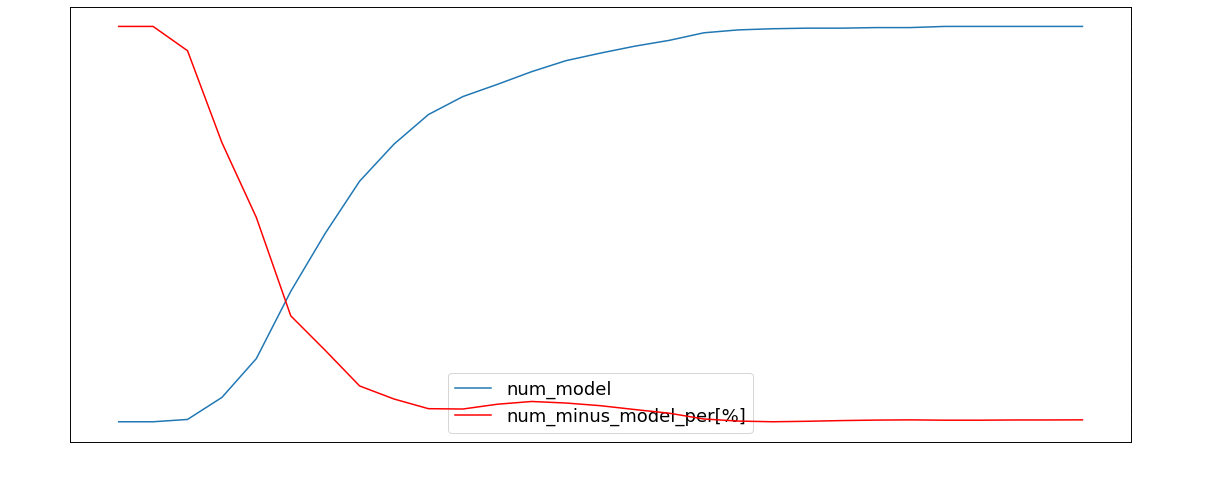

st_date:2020-10-01 00:00:00


<ipython-input-25-9c0ecb4f34f5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


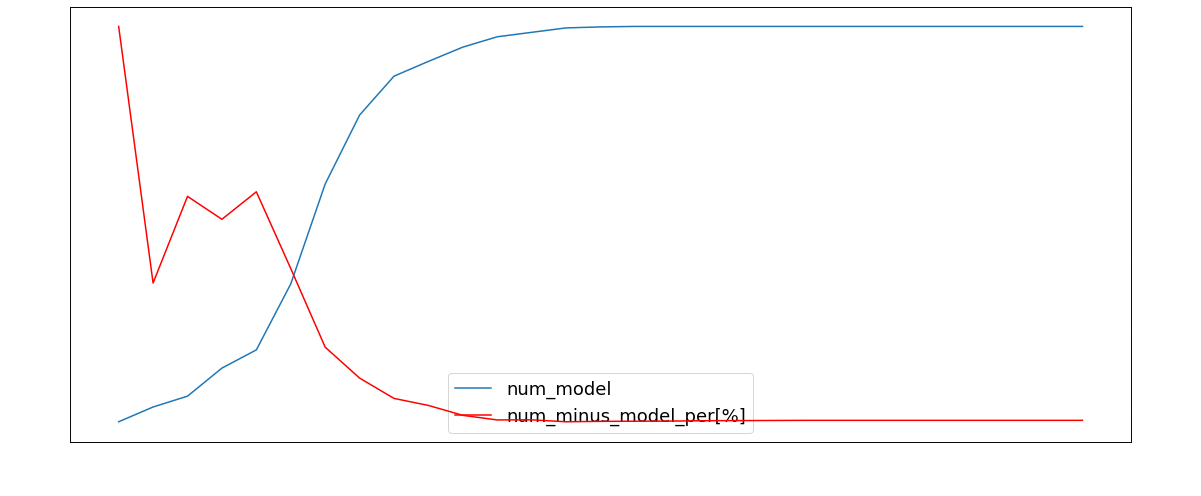

In [58]:
target_feature='buy_hit_per_std_test'
f_th_arr=np.arange(0.1, 3.0, 0.1)

for i in range(4):
    a_minus_arr=[0]*len(f_th_arr)#comの数の集計結果の格納場所
    a_model_arr=[0]*len(f_th_arr)#モデル数の集計結果の格納場所
    now_ym=datetime.datetime(year=2020, month=1+(i*3),day=1)
    dir_path = "../../bot_database/{place_name}/model_score_{place_name}/v4_score/{place_name}_model_score_st{stDate}_{V}.csv".format(place_name=place_name,V=version,stDate=now_ym.strftime('%Y%m%d'))#作成したデータの書き込み先#使用するデータの読み込み
    model_score_df=pd.read_csv(dir_path, encoding='utf_8_sig')
    model_score_df=model_score_df.drop(["Unnamed: 0"],axis=1)
    print('st_date:{}'.format(now_ym))
    for f_th_i in range(len(f_th_arr)):
        #条件の指定
        monthly_df=model_score_df[model_score_df['plus_month_num_test']>=2]
        monthly_df=monthly_df[monthly_df['num_hit_test']>=4].copy()
        
        monthly_th_df=monthly_df[monthly_df[target_feature]<=f_th_arr[f_th_i]].copy()#stdは小さいほうがうれしいので符号が逆転している
        gainth_df=gainth_analysis(monthly_th_df)
        plus_df=gainth_df.loc['110以上_120未満':].copy()
        minus_df=gainth_df.loc[:'110以上_120未満'].copy()
        num_plus_model=plus_df['num_model(row)'].sum()
        try:
            minus_model_per=(minus_df['num_model(row)'].sum()/gainth_df['num_model(row)'].sum())*100
        except ZeroDivisionError:
            minus_model_per=100
            
        a_model_arr[f_th_i]=num_plus_model
        a_minus_arr[f_th_i]=minus_model_per
    x_n=target_feature
    y1_n='num_model'
    y2_n='num_minus_model_per[%]'
    twin_plt(f_th_arr,a_model_arr,a_minus_arr,x_n,y1_n,y2_n)